# 6. 모듈 알아보기

In [1]:
from IPython.display import Image

## 6-1 내장 모듈 사용하기

### 모듈은 import 해서 사용한다

- 별칭을 사용할 때는 as 다음에 축약형 이름을 부여한다

In [3]:
import operator as op

### 모듈도 하나의 객체이다.

- 모듈 객체의 클래스 이름이 module이라는 것을 알 수 있다.

In [4]:
type(op)

module

In [7]:
op.__name__

'operator'

In [5]:
op.__class__

module

In [6]:
op.__class__.__bases__

(object,)

##  모듈 내에 정의된 함수 등을 확인

- dir 함수로 모듈을 확인하면 내부에 가진 모든 것을 문자열로 변환한다.
- 그중에 스페셜 속성이나 메소드는 제외


In [9]:
count = 0 
for i in dir(op) :
    if not i.startswith("_")  :
        print(i, end=",")
        count += 1
        if count % 5 ==0 :
            print()

abs,add,and_,attrgetter,concat,
contains,countOf,delitem,eq,floordiv,
ge,getitem,gt,iadd,iand,
iconcat,ifloordiv,ilshift,imatmul,imod,
imul,index,indexOf,inv,invert,
ior,ipow,irshift,is_,is_not,
isub,itemgetter,itruediv,ixor,le,
length_hint,lshift,lt,matmul,methodcaller,
mod,mul,ne,neg,not_,
or_,pos,pow,rshift,setitem,
sub,truediv,truth,xor,

## 덧셈을 처리하는 add 함수를 실행한다

In [10]:
op.add(100,200)

300

### 내부에 덧셈연산을 하는 __add__ 스페셜 메소드 여부 확인

- 클래스 내에서 스페셜 메소드가 없는 경우 예외가 발생한다.
- 예외는 try except 구문으로 처리한다.


In [20]:
def add(obj1, obj2) :
    try :
        if (obj1).__class__.__dict__['__add__'] :
            result = op.add(obj1,obj2)
    except KeyError as e :
        result = e
    return result

### 정수, 문자열, 튜플, 리스트에는 덧셈 연산자가 있다

In [21]:
add(100,200)

300

In [22]:
add("봄여름","가을겨울")

'봄여름가을겨울'

In [23]:
add((1,2), (3,4))

(1, 2, 3, 4)

### 집합에는 덧셈연산자가 없다

In [24]:
add({1,2}, {3,4})

KeyError('__add__')

## 6-2 사용자 정의 모듈 만들기

### 실행되는 모듈은 메인모듈이고 사용하는 모듈은 import해서 사용해야한다.

- 모듈 내에는 변수 함수 클래스 등을 정의해서 사용한다

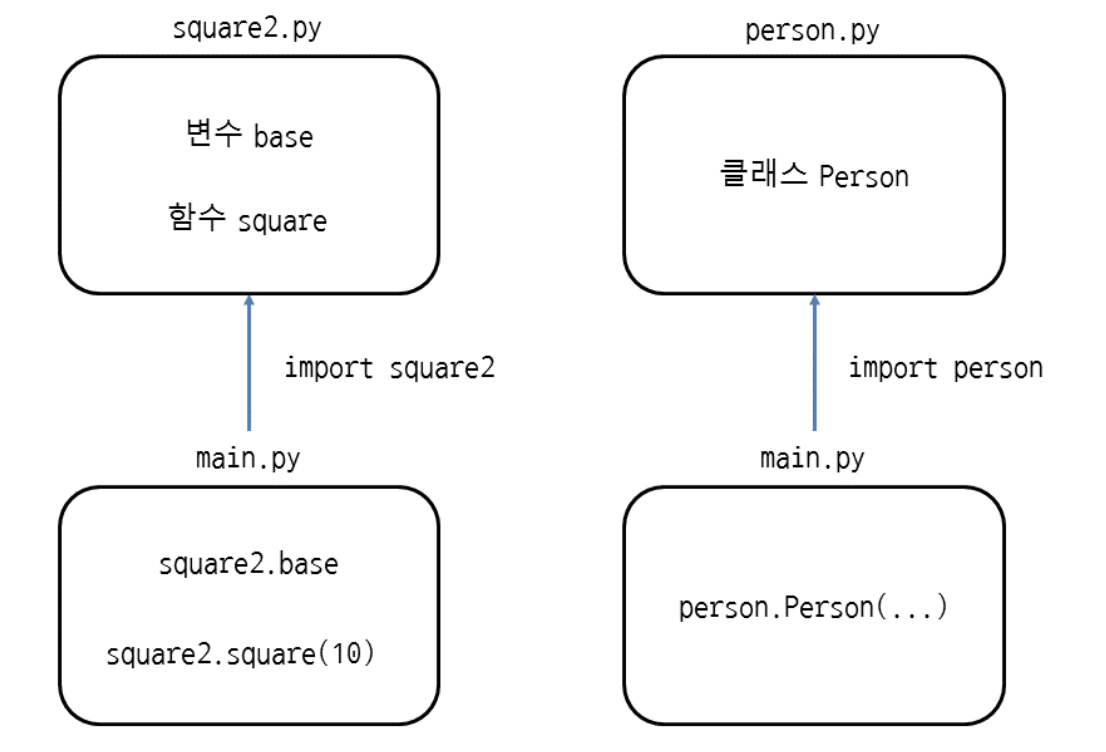

In [2]:
Image("./이미지/모듈임포트.png", width=400, height=400)

### 주피터 노트북 파일은 하나의 모듈로 인식한다.

- 모듈 이름을 확인하면 __main__이다.

In [25]:
__name__

'__main__'

In [26]:
if __name__ == "__main__" :
    print(" 실행되는 모듈은 메인 모듈임 ")

 실행되는 모듈은 메인 모듈임 


## 모듈을 만들기

In [28]:
%%writefile add.py

def add(x,y) :
    return x + y

Writing add.py


### 모듈을 임포트한다.

In [29]:
import add

### 모듈 내의 함수를 호출해서 실행한다

In [30]:
add.add(100,200)

300

In [31]:
if __name__ == '__main__' :
    print(add.add(300,400))

700


## 6-3 패키지 만들기

### 패키지 안에는 다양한 모듈을 관리할 수 있다.

- 패키지 내부에 패키지를 지정하고 다양한 모듈을 분리해서 처리할 수 있다.


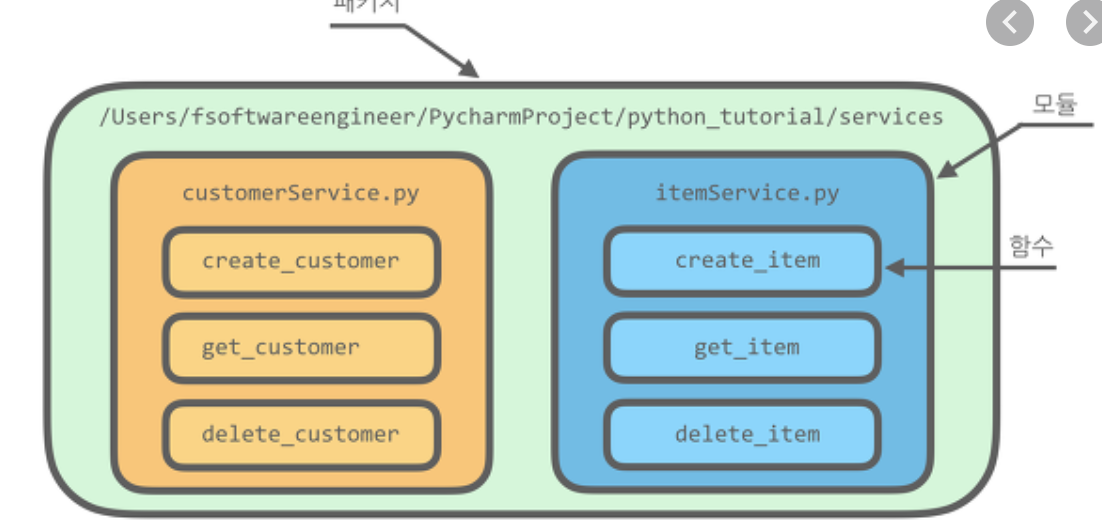

In [5]:
Image("./이미지/모듈과패키지.png", width=600, height=500)

###  디렉토리를 만든다 

In [1]:
%mkdir test

### 디렉토리를 이동한다

In [5]:
%cd test

C:\Users\dahlmoon\Documents\GitHub\python_data_analysis\test


### 파이썬 패키지로 인식하도록 __init__.py를 만든다.

- __all__ 이라는 리스트 변수가 있는데, 이 변수는 "from 패키지명 import *" 문을 사용할 때, 그 패키지 내에서 import 가능한 모듈들의 리스트를 담고 있다. 
즉, __all__ 에 없는 모듈은 import 되지 않고 에러가 발생한다.

In [12]:
%%writefile __init__.py
__all__ = ['add']

Writing __init__.py


### 현재 디렉토리를 조회한다

In [13]:
%ls

 C 드라이브의 볼륨: Windows
 볼륨 일련 번호: 5A74-C7D6

 C:\Users\dahlmoon\Documents\GitHub\python_data_analysis\test 디렉터리

2020-07-07  오후 09:22    <DIR>          .
2020-07-07  오후 09:22    <DIR>          ..
2020-07-07  오후 09:22    <DIR>          .ipynb_checkpoints
2020-07-07  오후 09:22                19 __init__.py
2020-07-07  오후 09:18    <DIR>          __pycache__
2020-07-07  오후 09:17                36 add.py
               2개 파일                  55 바이트
               4개 디렉터리  417,006,059,520 바이트 남음


### 새로운 모듈을 만든다

In [14]:
%%writefile add.py

def add(x,y) :
    return x + y

Overwriting add.py


### 패키지.모듈을 import 해서 사용해야한다,

In [15]:
import test.add as add

In [16]:
add.add(100,300)

400

### __all__ 내에 있는 모듈을 찾아서 임포트처리한다

In [17]:
from test.add  import *

In [18]:
add(500,600)

1100